In [1]:
# r example
#  y <- rpois(20,lambda=.3)
#  fcast <- croston(y)

#> y
#  [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0


# r result : 
# > fcast
#   Point Forecast
# 21       0.180018

# > fcast$fitted
# Time Series:
# Start = 1 
# End = 20 
# Frequency = 1 
#  [1]        NA 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.1666667
#  [8] 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667
# [15] 0.1666667 0.1666667 0.1666667 0.1538462 0.1680672 0.1680672


    

In [2]:
import pandas as pd

%matplotlib inline

In [3]:
lCounts = "0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0".split()
lCounts = [float(c) for c in lCounts]
N = len(lCounts)
lDates = pd.date_range(start="2000-01-01", periods=N, freq='m')

df = pd.DataFrame({"Date" : lDates, "Count" : lCounts})

In [4]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Date,2000-01-31 00:00:00,2000-02-29 00:00:00,2000-03-31 00:00:00,2000-04-30 00:00:00,2000-05-31 00:00:00,2000-06-30 00:00:00,2000-07-31 00:00:00,2000-08-31 00:00:00,2000-09-30 00:00:00,2000-10-31 00:00:00,2000-11-30 00:00:00,2000-12-31 00:00:00,2001-01-31 00:00:00,2001-02-28 00:00:00,2001-03-31 00:00:00,2001-04-30 00:00:00,2001-05-31 00:00:00,2001-06-30 00:00:00,2001-07-31 00:00:00,2001-08-31 00:00:00
Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [5]:
#  q is often called the “demand” and a the “inter-arrival time”.
q = df[abs(df['Count']) > 0.0]['Count']
demand_times = pd.Series(list(q.index)) + 1
a = demand_times - demand_times.shift(1).fillna(0.0)
df2 = pd.DataFrame({'demand_time' : list(demand_times), 'q' : list(q) , 'a' : list(a) })
df2

,demand_time,q,a
0,19,1.0,19.0


In [6]:
def get_coeff(alpha , croston_type):
    if(croston_type == "sba"):
        return 1.0-(alpha/2.0)
    elif(croston_type == "sbj"):
        return (1.0 - alpha/(2.0-alpha))
    # default 
    return 1.0

In [7]:
# q  and a forecast
alpha = 0.3

df2['q_est'] = None
df2['a_est'] = None

df2.loc[0 , 'q_est'] = df2['q'][0]
df2.loc[0,  'a_est'] = df2['a'][0]
for i in range(df2.shape[0] - 1):
    q1 = (1.0 - alpha) * df2['q_est'][ i ] + alpha * df2['q'][ i ]
    a1 = (1.0 - alpha) * df2['a_est'][ i ] + alpha * df2['a'][ i ]
    df2.loc[i + 1, 'q_est'] = q1
    df2.loc[i + 1, 'a_est'] = a1


In [8]:
df2['forecast'] = get_coeff(alpha , "default") * df2['q_est'] / df2['a_est']
df2

,demand_time,q,a,q_est,a_est,forecast
0,19,1.0,19.0,1,19,0.052632


In [11]:
forecast_11 = df2['q_est'][df2.shape[0] - 1] / df2['a_est'][df2.shape[0] - 1]

In [12]:
forecast_11

0.05263157894736842

In [14]:
df2['index'] = df2['demand_time'] - 1

In [15]:
df1 = df.reset_index()
df3 = df1.merge(df2 , how='left', on=('index' , 'index'))


In [16]:
df3

,index,Date,Count,demand_time,q,a,q_est,a_est,forecast
0,0,2000-01-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000-02-29,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000-03-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000-04-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000-05-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2000-06-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2000-07-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2000-08-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2000-09-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2000-10-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df4 = df3.fillna(method='ffill')

In [18]:
df4

,index,Date,Count,demand_time,q,a,q_est,a_est,forecast
0,0,2000-01-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2000-02-29,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2000-03-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2000-04-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2000-05-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5,2000-06-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,6,2000-07-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2000-08-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2000-09-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,9,2000-10-31,0.0,NaN,NaN,NaN,NaN,NaN,NaN


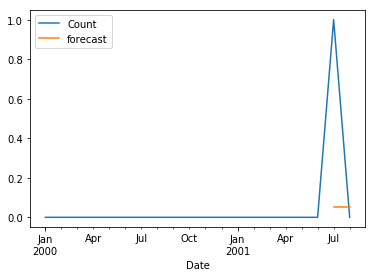

In [19]:
df4.plot('Date', ['Count' , 'forecast'])